# MapReader Workshop @ ADHO DH 2025
## Patch Classification with IIIF Resources


**For use in Google Colab**
 

Written by Rosie Wood and Katherine McDonough.
Reviewed and tested by Kaspar Beelen and Daniel Wilson.

Learn more about the MapReader team at https://github.com/maps-as-data/MapReader?tab=readme-ov-file#contributors. 

Run the next cell while we go through the slides.

In [ ]:
# set up for google colab - this cell will take a while to run!
!git clone https://github.com/maps-as-data/workshop-dh2025
!pip install -r workshop-dh2025/requirements.txt

In [ ]:
# enable custom widgets in colab
from google.colab import output
output.enable_custom_widget_manager()

# Download

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/1-download.html

In [1]:
from mapreader import IIIFDownloader

In [2]:
downloader = IIIFDownloader(
    "https://annotations.allmaps.org/manifests/a0d6d3379cfd9f0a",
    iiif_versions=3,
    iiif_uris="https://annotations.allmaps.org/manifests/a0d6d3379cfd9f0a"
)

[WARNING] AnnotationPage is missing 'id' field.


In [3]:
downloader.save_georeferenced_maps(path_save="maps_iiif")

  0%|          | 0/4 [00:00<?, ?it/s]

[INFO] '83d44a0b956681b0' already exists. Skipping download.
[INFO] '3b72f58c723da9c4' already exists. Skipping download.
[INFO] 'bb4029969eeff948' already exists. Skipping download.
[INFO] '5cf13f6681d355e3' already exists. Skipping download.


## Load maps and patchify

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/2-load.html

Now we have saved our IIIF maps, we can just follow the same steps as in the previous notebook.

We will now load both maps and their metadata using the `loader`.

From here, we can patchify our maps, visualise metadata and add further information about our maps/patches.

In [1]:
from mapreader import loader

In [2]:
my_maps = loader("./maps_iiif/*masked.tif")

  0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
my_maps.add_metadata("./maps_iiif/metadata.csv")

[INFO] Loading metadata from CSV/TSV/etc file.


In [4]:
print(my_maps) # see which maps you have loaded

#images: 4

#parents: 4
5cf13f6681d355e3_masked.tif
83d44a0b956681b0_masked.tif
bb4029969eeff948_masked.tif
3b72f58c723da9c4_masked.tif

#patches: 0



In [5]:
parent_df = my_maps.convert_images()[0]
parent_df

,parent_id,image_path,coordinates,crs,shape,geometry,name,id,iiif_uri
image_id,,,,,,,,,
5cf13f6681d355e3_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.900921191702168, 52.34125602815868, 4.94575...",EPSG:4326,"(3994, 5240, 3)","POLYGON ((4.94575 52.34126, 4.94575 52.36392, ...",5cf13f6681d355e3_masked.tif,5cf13f6681d355e3,NaN
83d44a0b956681b0_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.932126788985147, 52.346088229862225, 4.9745...",EPSG:4326,"(3949, 5208, 3)","POLYGON ((4.97455 52.34609, 4.97455 52.36860, ...",83d44a0b956681b0_masked.tif,83d44a0b956681b0,NaN
bb4029969eeff948_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.937841493675355, 52.33235655933771, 4.98039...",EPSG:4326,"(3959, 5288, 3)","POLYGON ((4.98039 52.33236, 4.98039 52.35465, ...",bb4029969eeff948_masked.tif,bb4029969eeff948,NaN
3b72f58c723da9c4_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.906625929237961, 52.32731270218905, 4.95163...",EPSG:4326,"(4003, 5328, 3)","POLYGON ((4.95163 52.32731, 4.95163 52.34996, ...",3b72f58c723da9c4_masked.tif,3b72f58c723da9c4,NaN


### Patchify maps

Choosing a patch size is an important part of using MapReader.

Before patchifying our maps, we need to think about which visual features we want to find in our maps. This will help us pick a suitable patch size.

Types of features we might want to label are:

- Continuous features (e.g. roads, rivers, lines/patterns/shading)
- Discrete features (e.g. buildings, trees, other symbology)
- Abstract or composite concepts features (e.g. farmland, urban/rural areas)

The patch size should be large enough to distinguish our visual features but small enough to get useful results.

Since we have added metadata to our maps, we have information about their coordinates and so can use the "meters" method to patchify our maps.

We will be annotating buildings and will slice our maps into 100x100 meter patches for this workshop.

In [6]:
my_maps.patchify_all(method="meters", patch_size=100, skip_blank_patches=True)

[INFO] Saving patches in directory named "patches_100_meters".


  0%|          | 0/4 [00:00<?, ?it/s]

maps_iiif/5cf13f6681d355e3_masked.tif
maps_iiif/83d44a0b956681b0_masked.tif
maps_iiif/bb4029969eeff948_masked.tif
maps_iiif/3b72f58c723da9c4_masked.tif


> If you now look in your files you will see a `patches_100_meters` directory which contains all the patches of your two maps.

In [7]:
print(my_maps)

#images: 3506

#parents: 4
5cf13f6681d355e3_masked.tif
83d44a0b956681b0_masked.tif
bb4029969eeff948_masked.tif
3b72f58c723da9c4_masked.tif

#patches: 3502
patch-0-0-158-158-#5cf13f6681d355e3_masked.tif#.png
patch-0-158-158-316-#5cf13f6681d355e3_masked.tif#.png
patch-0-316-158-474-#5cf13f6681d355e3_masked.tif#.png
patch-0-474-158-632-#5cf13f6681d355e3_masked.tif#.png
patch-0-632-158-790-#5cf13f6681d355e3_masked.tif#.png
patch-0-790-158-948-#5cf13f6681d355e3_masked.tif#.png
patch-0-948-158-1106-#5cf13f6681d355e3_masked.tif#.png
patch-0-1106-158-1264-#5cf13f6681d355e3_masked.tif#.png
patch-0-1264-158-1422-#5cf13f6681d355e3_masked.tif#.png
patch-0-1422-158-1580-#5cf13f6681d355e3_masked.tif#.png
patch-0-1580-158-1738-#5cf13f6681d355e3_masked.tif#.png
...



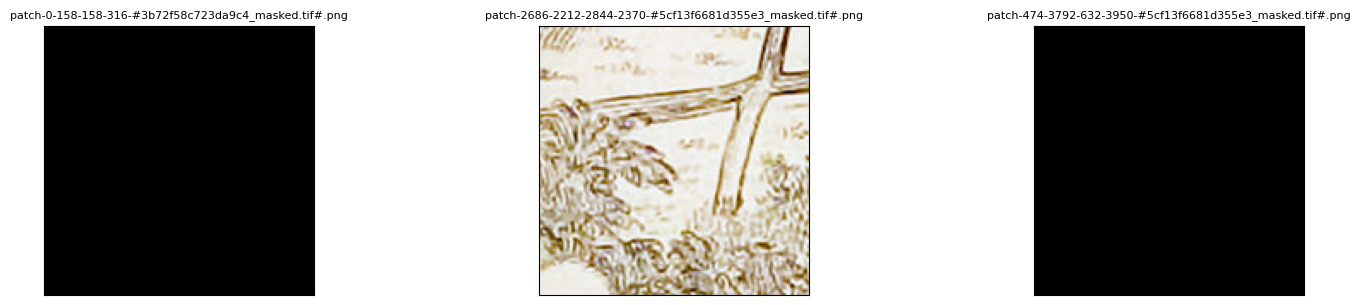

In [8]:
# show a sample of the patches
my_maps.show_sample(num_samples=3, tree_level="patch")

Since our model will be looking at pixel values to classify our patches, it can be useful to know some statistics about these.

- The mean pixel value for a patch gives an idea of the average "brightness" of the patch, with higher values indicating lighter patches so more empty/white space.
- The standard deviation of pixel values gives an idea of the variation in pixel values across the patch. Higher values indicate more variation in pixel values.

We can calculate these statistics using the `calc_pixel_stats()` method:

In [9]:
my_maps.calc_pixel_stats()

  0%|          | 0/4 [00:00<?, ?it/s]

We can look at what information we have about each of our parent images and patches (including the pixel statistics we just calculated).

The easiest way to do this is to create dataframes containing parent and patch information using the `convert_images()` method:

In [10]:
parent_df, patch_df = my_maps.convert_images()

In [11]:
parent_df.head() # parent information

,parent_id,image_path,coordinates,crs,shape,geometry,name,id,iiif_uri,patches,dlon,dlat
image_id,,,,,,,,,,,,
5cf13f6681d355e3_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.900921191702168, 52.34125602815868, 4.94575...",EPSG:4326,"(3994, 5240, 3)","POLYGON ((4.94575 52.34126, 4.94575 52.36392, ...",5cf13f6681d355e3_masked.tif,5cf13f6681d355e3,NaN,[patch-0-0-158-158-#5cf13f6681d355e3_masked.ti...,0.000009,0.000006
83d44a0b956681b0_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.932126788985147, 52.346088229862225, 4.9745...",EPSG:4326,"(3949, 5208, 3)","POLYGON ((4.97455 52.34609, 4.97455 52.36860, ...",83d44a0b956681b0_masked.tif,83d44a0b956681b0,NaN,[patch-0-0-157-157-#83d44a0b956681b0_masked.ti...,0.000008,0.000006
bb4029969eeff948_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.937841493675355, 52.33235655933771, 4.98039...",EPSG:4326,"(3959, 5288, 3)","POLYGON ((4.98039 52.33236, 4.98039 52.35465, ...",bb4029969eeff948_masked.tif,bb4029969eeff948,NaN,[patch-0-0-159-159-#bb4029969eeff948_masked.ti...,0.000008,0.000006
3b72f58c723da9c4_masked.tif,None,/Users/rwood/projects/DataCulture/workshop-dh2...,"(4.906625929237961, 52.32731270218905, 4.95163...",EPSG:4326,"(4003, 5328, 3)","POLYGON ((4.95163 52.32731, 4.95163 52.34996, ...",3b72f58c723da9c4_masked.tif,3b72f58c723da9c4,NaN,[patch-0-0-158-158-#3b72f58c723da9c4_masked.ti...,0.000008,0.000006


In [12]:
patch_df.head() # patch information (showing only first 5 rows)

,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,mean_pixel,mean_pixel_R,mean_pixel_G,mean_pixel_B,std_pixel,std_pixel_R,std_pixel_G,std_pixel_B
image_id,,,,,,,,,,,,,,,
patch-0-0-158-158-#5cf13f6681d355e3_masked.tif#.png,5cf13f6681d355e3_masked.tif,/Users/rwood/projects/DataCulture/workshop-dh2...,"(158, 158, 3)","(0, 0, 158, 158)","(4.900921191702168, 52.3630246092009, 4.902272...",EPSG:4326,"POLYGON ((4.90227 52.36302, 4.90227 52.36392, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
patch-0-158-158-316-#5cf13f6681d355e3_masked.tif#.png,5cf13f6681d355e3_masked.tif,/Users/rwood/projects/DataCulture/workshop-dh2...,"(158, 158, 3)","(0, 158, 158, 316)","(4.900921191702168, 52.36212798881387, 4.90227...",EPSG:4326,"POLYGON ((4.90227 52.36213, 4.90227 52.36302, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
patch-0-316-158-474-#5cf13f6681d355e3_masked.tif#.png,5cf13f6681d355e3_masked.tif,/Users/rwood/projects/DataCulture/workshop-dh2...,"(158, 158, 3)","(0, 316, 158, 474)","(4.900921191702168, 52.36123136842683, 4.90227...",EPSG:4326,"POLYGON ((4.90227 52.36123, 4.90227 52.36213, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
patch-0-474-158-632-#5cf13f6681d355e3_masked.tif#.png,5cf13f6681d355e3_masked.tif,/Users/rwood/projects/DataCulture/workshop-dh2...,"(158, 158, 3)","(0, 474, 158, 632)","(4.900921191702168, 52.36033474803979, 4.90227...",EPSG:4326,"POLYGON ((4.90227 52.36033, 4.90227 52.36123, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
patch-0-632-158-790-#5cf13f6681d355e3_masked.tif#.png,5cf13f6681d355e3_masked.tif,/Users/rwood/projects/DataCulture/workshop-dh2...,"(158, 158, 3)","(0, 632, 158, 790)","(4.900921191702168, 52.35943812765276, 4.90227...",EPSG:4326,"POLYGON ((4.90227 52.35944, 4.90227 52.36033, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Annotate

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/3-annotate.html

In [13]:
from mapreader import Annotator

Before we begin annotating, we need to set up our annotation task by specifying labels, a task name and a username for the person annotating.

There are two options for picking good labels:
- Binary labels: e.g. "building" and "not building"/"no"
- Multi-class labels (but these must be mutually exclusive!): e.g. "building", "road", "building and road" and "neither building nor road"/"no"

>__*NOTE*__: You can change the labels in the cell below if you'd like to annotate something else!!

In [14]:
task_name = "buildings" # rename if you want to try a different task
labels = ["building", "no"] # change these to the labels you want to use
username = "rosie" # change this to your username

In [15]:
annotator = Annotator(
    patch_df, # the information about our patches
    parent_df, # the information about our parent images
    task_name=task_name,
    labels=labels,
    username=username,
    resize_to=300, # resize the patches to 300x300 pixels in the annotation interface
	)

[INFO] Loading existing patch annotations.


First, we will annotate with no context image.
This is representative of what the model sees during training so can be helpful for understanding what visual features are a good choice for labelling.

> Do as many annotations as you want here (we will do more annotations in the cell below).

In [16]:
annotator.annotate()

Output(layout=Layout(align_items='center', display='flex', flex_flow='column'))

In [17]:
print(len(annotator.get_labelled_data())) # see number of annotations
annotator.get_labelled_data() # see annotations

58


,label,image_path,parent_id,pixel_bounds
image_id,,,,
patch-632-1580-790-1738-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(632, 1580, 790, 1738)"
patch-948-948-1106-1106-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(948, 948, 1106, 1106)"
patch-1264-2844-1422-3002-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(1264, 2844, 1422, 3002)"
patch-1580-1580-1738-1738-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(1580, 1580, 1738, 1738)"
patch-1580-2212-1738-2370-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(1580, 2212, 1738, 2370)"
patch-2212-158-2370-316-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(2212, 158, 2370, 316)"
patch-2212-790-2370-948-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(2212, 790, 2370, 948)"
patch-2370-3634-2528-3792-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(2370, 3634, 2528, 3792)"
patch-2844-2054-3002-2212-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(2844, 2054, 3002, 2212)"


To make annotating easier, it can be helpful to see the patch in its surrounding context.
This is done by setting `show_context=True`.

We will now have a go at this.

In [18]:
annotator.annotate(show_context=True, resize_to=600) # show the context of the patch and resize to 600x600 pixels to make it easier to see

Output(layout=Layout(align_items='center', display='flex', flex_flow='column'))

In [19]:
print(len(annotator.get_labelled_data())) # see number of annotations
annotator.get_labelled_data() # new annotations are added to the existing ones

82


,label,image_path,parent_id,pixel_bounds
image_id,,,,
patch-632-1580-790-1738-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(632, 1580, 790, 1738)"
patch-948-948-1106-1106-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(948, 948, 1106, 1106)"
patch-1264-2844-1422-3002-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(1264, 2844, 1422, 3002)"
patch-1580-1580-1738-1738-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(1580, 1580, 1738, 1738)"
patch-1580-2212-1738-2370-#3b72f58c723da9c4_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,3b72f58c723da9c4_masked.tif,"(1580, 2212, 1738, 2370)"
...,...,...,...,...
patch-3975-3180-4134-3339-#bb4029969eeff948_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,bb4029969eeff948_masked.tif,"(3975, 3180, 4134, 3339)"
patch-4611-1113-4770-1272-#bb4029969eeff948_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,bb4029969eeff948_masked.tif,"(4611, 1113, 4770, 1272)"
patch-4929-636-5088-795-#bb4029969eeff948_masked.tif#.png,no,/Users/rwood/projects/DataCulture/workshop-dh2...,bb4029969eeff948_masked.tif,"(4929, 636, 5088, 795)"


> If you now look in your files you will see an `annotations` directory containing a CSV file with your annotations.
This file is auto-saved and updated each time you add new annotations.

In [20]:
annotator.annotations_file # see the path to the annotations file

'./annotations/buildings_#rosie#.csv'

## Train your model

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/4-classify/train.html

There is no definite answer to how many annotations you need to train a model.
However, the more annotations you have, the better your model will likely be - e.g. for our railspace/building models we had 62K annotations!

> __*NOTE:*__ It is very unlikely you will have time to do enough annotations in the workshop to create a great model, but you should have enough to see some results.

Here are some tips for getting the most out of your annotations:

- Start by annotating a representative sample of your data.
- In most experiments, patch-level classification is quick and so we can iteratively check the performance of our models after training. i.e. Do some annotations, train your model, visually inspect results to identify systematic errors, do some targeted annotations to fix these errors, then repeat the training process and so on.
- Use contextual information - If you expect a certain pattern in neighboring patches you can use that information to identify and locate possible errors.
- Use external datasets (e.g., StopsGB and railway patches).

### Load annotations

In [21]:
from mapreader import AnnotationsLoader

In [22]:
annotations = AnnotationsLoader() # initialise

annotations.load(
    annotator.annotations_file, # path to the annotations file
)

[INFO] Reading "./annotations/buildings_#rosie#.csv"
[INFO] Number of annotations:   82

[INFO] Number of instances of each label (from column "label"):
    - no:  76
    - building:  6



During model training labels must be integers instead of strings so the `AnnotationsLoader` will create a mapping between labels and label indices.

In [23]:
annotations.labels_map # the mapping between the labels and label indices

{0: 'no', 1: 'building'}

To fine-tune our model, we will split our annotations into train (70%), validation (15%) and test (15%) datasets.

- The train dataset is used to train the model (i.e. to update the model parameters).
- The validation set is used to evaluate the model's performance during training (but not to update the model parameters).
- The test set is unseen data reserved for us to use to evaluate the model's performance after training.

e.g. if you have 100 annotations, the train dataset will have 70 annotations, the validation dataset will have 15 annotations and the test dataset will have 15 annotations.

In [24]:
annotations.create_datasets() # create the datasets

[INFO] Number of annotations in each set:
    - train:   57
    - val:   12
    - test:   13


You will need to have __*at least*__ one instance of each label in each dataset (ideally you'd want a lot more than this, but for the workshop it should be fine).

You can check this using the code below:

In [25]:
for set_name, dataset in annotations.datasets.items():
    print(f"Number of instances of each label in '{set_name}':\n{dataset.patch_df['label'].value_counts().to_dict()}\n")

Number of instances of each label in 'train':
{'no': 53, 'building': 4}

Number of instances of each label in 'val':
{'no': 11, 'building': 1}

Number of instances of each label in 'test':
{'no': 12, 'building': 1}



> Continue to training the model if you feel you have enough annotations. If not, go back and add some more using the cells above.

In [26]:
dataloaders = annotations.create_dataloaders() # create the dataloaders

[INFO] Using default sampler.


### Set up and train the model

In [27]:
from mapreader import ClassifierContainer

In [28]:
my_classifier = ClassifierContainer(
    "resnet18", # the model architecture, choose from https://pytorch.org/vision/0.8/models.html
    labels_map=annotations.labels_map,
    dataloaders=dataloaders,
)

[INFO] Device is set to cpu
[INFO] Initializing model.
[INFO] Loaded "train" with 57 items.
[INFO] Loaded "val" with 12 items.
[INFO] Loaded "test" with 13 items.


In [29]:
my_classifier.add_loss_fn("cross-entropy") # add the loss function

[INFO] Using "CrossEntropyLoss()" as loss function.


In [30]:
my_classifier.initialize_optimizer("adam") # add the optimizer

In [31]:
my_classifier.initialize_scheduler() # add the scheduler

Now we can actually train the model, we will start with 10 epochs (1 epoch = 1 full pass through the training data):

In [32]:
# train the model
my_classifier.train(num_epochs=10)

[INFO] Each step will pass: ['train', 'val'].
2025-07-11 11:13:02 599-JY5FK6 [INFO] train    -- 1/10 --      16/57 ( 28.1% ) -- Loss: 0.626
2025-07-11 11:13:05 599-JY5FK6 [INFO] train    -- 1/10 -- Loss: 0.558; F_macro: 0.75; R_macro: 0.76
2025-07-11 11:13:05 599-JY5FK6 [INFO] val      -- 1/10 --      12/12 (100.0% ) -- Loss: 0.955
2025-07-11 11:13:05 599-JY5FK6 [INFO] val      -- 1/10 -- Loss: 0.955; F_macro: 0.50; R_macro: 0.77

2025-07-11 11:13:07 599-JY5FK6 [INFO] train    -- 2/10 --      16/57 ( 28.1% ) -- Loss: 0.519
2025-07-11 11:13:10 599-JY5FK6 [INFO] train    -- 2/10 -- Loss: 0.420; F_macro: 0.88; R_macro: 0.88
2025-07-11 11:13:10 599-JY5FK6 [INFO] val      -- 2/10 --      12/12 (100.0% ) -- Loss: 0.074
2025-07-11 11:13:10 599-JY5FK6 [INFO] val      -- 2/10 -- Loss: 0.074; F_macro: 1.00; R_macro: 1.00

[INFO] Checkpoint file saved to "./tmp_checkpoints/tmp_7479902459_checkpoint.pkl".
2025-07-11 11:13:12 599-JY5FK6 [INFO] train    -- 3/10 --      16/57 ( 28.1% ) -- Loss: 0.767

> If you now look in your files you will see a `models` directory containing your model files.

### Visualize progress

MapReader logs a number of common metrics during model training/evaluation and saves them in a dictionary ``my_classifier.metrics``.
For example:
- loss, calculated using the loss function we defined earlier (i.e. cross-entropy)
- f-scores
- precision scores
- recall scores

[This page](https://cohere.com/blog/classification-eval-metrics) provides a good overview of what each of these scores mean.

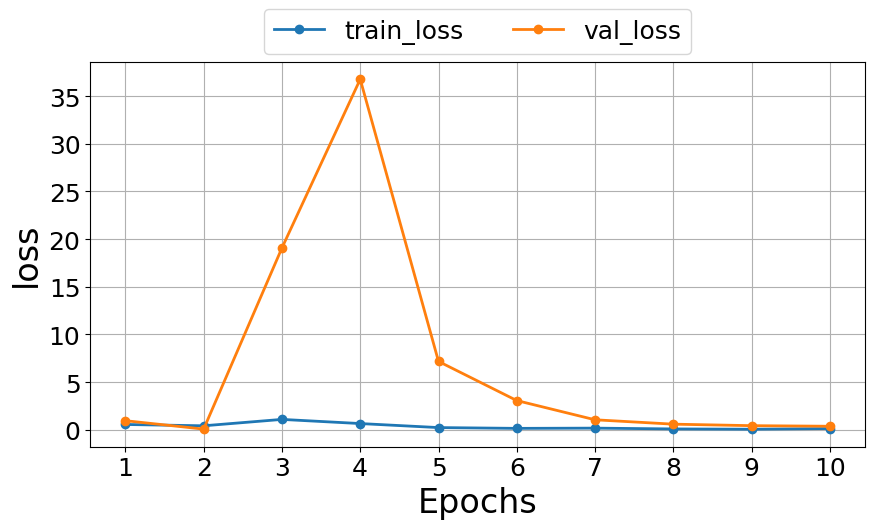

In [33]:
my_classifier.plot_metric(
    metrics="loss", # choose the metric to plot
	phases=["train", "val"], # choose the phases to plot
    )

## Infer

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/4-classify/infer.html

We first need to create a new dataset containing all our patches, including the ones from the map we didn't annotate.

In [34]:
from mapreader import PatchDataset

In [35]:
patch_dataset = PatchDataset(
    patch_df,
    transform="test", # apply the test transform on the patches
    )

In [36]:
my_classifier.load_dataset(patch_dataset, set_name="all_patches") # load the dataset

Now we can use our fine-tuned model to predict the labels on the rest of our patches:

In [37]:
my_classifier.inference(set_name="all_patches")

[INFO] Each step will pass: ['all_patches'].
2025-07-11 11:13:51 599-JY5FK6 [INFO] all_patches -- 11/11 --    16/3502 (  0.5% ) -- 
2025-07-11 11:13:54 599-JY5FK6 [INFO] all_patches -- 11/11 --    96/3502 (  2.7% ) -- 
2025-07-11 11:13:58 599-JY5FK6 [INFO] all_patches -- 11/11 --   176/3502 (  5.0% ) -- 
2025-07-11 11:14:02 599-JY5FK6 [INFO] all_patches -- 11/11 --   256/3502 (  7.3% ) -- 
2025-07-11 11:14:05 599-JY5FK6 [INFO] all_patches -- 11/11 --   336/3502 (  9.6% ) -- 
2025-07-11 11:14:09 599-JY5FK6 [INFO] all_patches -- 11/11 --   416/3502 ( 11.9% ) -- 
2025-07-11 11:14:12 599-JY5FK6 [INFO] all_patches -- 11/11 --   496/3502 ( 14.2% ) -- 
2025-07-11 11:14:16 599-JY5FK6 [INFO] all_patches -- 11/11 --   576/3502 ( 16.4% ) -- 
2025-07-11 11:14:20 599-JY5FK6 [INFO] all_patches -- 11/11 --   656/3502 ( 18.7% ) -- 
2025-07-11 11:14:23 599-JY5FK6 [INFO] all_patches -- 11/11 --   736/3502 ( 21.0% ) -- 
2025-07-11 11:14:27 599-JY5FK6 [INFO] all_patches -- 11/11 --   816/3502 ( 23.3% ) --

In [39]:
my_classifier.save_predictions("all_patches") # save the predictions

[INFO] Saved predictions to all_patches_predictions_patch_df.csv.


> If you now look in your files you will see a file called ``all_patches_predictions_patch_df.csv`` which contains predictions for each patch.

### Visualize results

We can load the predictions as metadata in our `my_maps` object.
This makes it easy to visualize our predictions.

In [40]:
my_maps.add_metadata(
    "./all_patches_predictions_patch_df.csv",
    tree_level="patch" # add the predictions as patch metadata
)

[INFO] Loading metadata from CSV/TSV/etc file.


In [41]:
# Visualise predicted labels on map (change to 0 or 1 for each parent map)

# Yellow = 1 (building)
# Purple = 0 (no building)

parent_list = my_maps.list_parents()
my_maps.explore_patches(
    parent_list[1],
    column_to_plot="pred",
)

We can save our results as CSVs, or in GEOJSON format for use in GIS software:

In [42]:
parent_df, patch_df = my_maps.convert_images(save=True, save_format="csv") # as CSV

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


In [43]:
my_maps.save_patches_to_geojson("predicted_outputs_iiif.geojson", rewrite=True) # as GeoJSON

### You are done! 

Next, you can
- add more annotations to improve your model performance,
- try out your model on other map sheets, or
- test different patch sizes and labels.
